In [79]:
# Initialize formulas that calculate XmR data, using either the median or average

import statistics

def xmr_data_from_median(data):
  average = sum(data) / len(data)

  moving_ranges = []

  for i in range(1, len(data)):
    moving_ranges.append(abs(data[i - 1] - data[i]))

  moving_range = statistics.median(moving_ranges)

  # How to handle situations where there's a natural floor or ceiling?
  upper_natural_process_limit = average + (3.14 * moving_range)
  lower_natural_process_limit = average - (3.14 * moving_range) 
  
  upper_range_limit = 3.87 * moving_range 

  return (
    average,
    moving_ranges,
    moving_range,
    upper_natural_process_limit,
    lower_natural_process_limit,
    upper_range_limit
  )

def xmr_data_from_average(data):
  average = sum(data) / len(data)

  moving_ranges = []

  for i in range(1, len(data)):
    moving_ranges.append(abs(data[i - 1] - data[i]))

  moving_range = sum(moving_ranges) / (len(moving_ranges))

  # How to handle situations where there's a natural floor or ceiling?
  upper_natural_process_limit = average + (2.66 * moving_range)
  lower_natural_process_limit = average - (2.66 * moving_range) 
  
  upper_range_limit = 3.27 * moving_range 

  return (
    average,
    moving_ranges,
    moving_range,
    upper_natural_process_limit,
    lower_natural_process_limit,
    upper_range_limit
  )


In [80]:
#Invoke one of the two functions

sample_data = [10, 11, 15, 13, 12, 9, 9, 20, 13, 11, 10, 9, 9]

(
  average,
  moving_ranges,
  moving_range,
  upper_natural_process_limit,
  lower_natural_process_limit,
  upper_range_limit
) = xmr_data_from_median(sample_data)

# (
#   average,
#   moving_ranges,
#   moving_range,
#   upper_natural_process_limit,
#   lower_natural_process_limit,
#   upper_range_limit
# ) = xmr_data_from_average(sample_data)


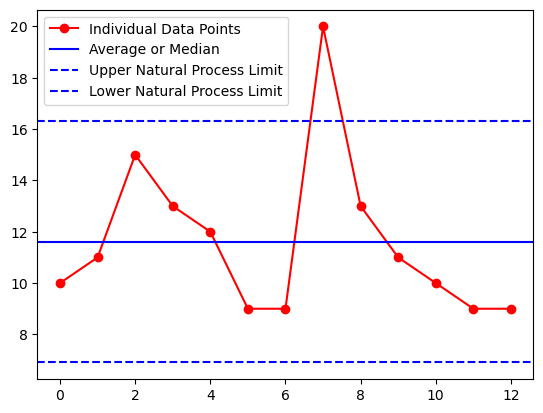

In [81]:
# Plot the first XmR graph: Individual values

import matplotlib.pyplot as plt

plt.plot(sample_data, color='r', marker='o', label='Individual Data Points')

plt.axhline(y=average, color='b', linestyle='-', label='Average or Median')
plt.axhline(y=upper_natural_process_limit, color='b', linestyle='--', label='Upper Natural Process Limit')
plt.axhline(y=lower_natural_process_limit, color='b', linestyle='--', label='Lower Natural Process Limit')

plt.legend(loc='upper left')
plt.show()

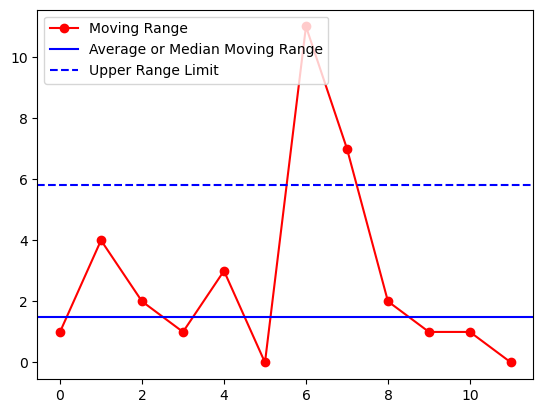

In [82]:
# Plot the second XmR chart: Moving range

plt.plot(moving_ranges, color='r', marker='o', label='Moving Range')

plt.axhline(y=moving_range, color='b', label='Average or Median Moving Range')
plt.axhline(y=upper_range_limit, color='b', linestyle='--', label='Upper Range Limit')

plt.legend(loc='upper left')
plt.show()